# Explaratory Analysis

* Clean both CSV files
* Make date format consistent
* Merge datasets
* Convert units properly
* Check missing values
* Check outliers
* Explore correlation

In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Load files
ndvi = pd.read_csv('NDVI_monthly_2018_2023.csv')
era5 = pd.read_csv('ERA5_monthly_2018_2023.csv')

In [ ]:
ndvi.head()

,system:time_start,NDVI
0,"Jan 1, 2018",0.172
1,"Feb 1, 2018",0.158
2,"Mar 1, 2018",0.199
3,"Apr 1, 2018",0.246
4,"May 1, 2018",0.232


In [ ]:
era5.head()

,system:index,date,evapotranspiration,precipitation,temperature,.geo
0,0,2018-01,-0.167673,0.486523,278.898585,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1,2018-02,-0.261340,0.248340,278.079190,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,2,2018-03,-0.228287,0.127923,284.147184,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,3,2018-04,-0.217768,0.207254,286.765463,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,4,2018-05,-0.237616,0.168795,289.506570,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [ ]:
# Clean NDVI date column
ndvi['date'] = pd.to_datetime(ndvi['system:time_start'])
ndvi['date'] = ndvi['date'].dt.strftime('%Y-%m')

ndvi = ndvi[['date', 'NDVI']]

# Clean ERA5
era5 = era5[['date', 'precipitation', 'temperature', 'evapotranspiration']]

# Convert temperature from Kelvin to Celsius
era5['temperature'] = era5['temperature'] - 273.15

# Make evapotranspiration positive
era5['evapotranspiration'] = era5['evapotranspiration'].abs()

# Convert precipitation and evapotranspiration from meters to mm
era5['precipitation'] = era5['precipitation'] * 1000
era5['evapotranspiration'] = era5['evapotranspiration'] * 1000

# Merge datasets
data = pd.merge(ndvi, era5, on='date')

data.head()


,date,NDVI,precipitation,temperature,evapotranspiration
0,2018-01,0.172,486.522642,5.748585,167.672951
1,2018-02,0.158,248.339798,4.929190,261.339836
2,2018-03,0.199,127.923360,10.997184,228.286915
3,2018-04,0.246,207.253762,13.615463,217.767921
4,2018-05,0.232,168.795162,16.356570,237.616098


In [ ]:
#Check missing values
print(data.isnull().sum())


date                  0
NDVI                  0
precipitation         0
temperature           0
evapotranspiration    0
dtype: int64


In [ ]:
#Statistical Summary
print(data.describe())


            NDVI  precipitation  temperature  evapotranspiration
count  71.000000      71.000000    71.000000           71.000000
mean    0.187944     160.508670    16.529668          163.279709
std     0.027545     172.062146     7.132261          102.281283
min     0.136000       3.664362     4.929190           30.606600
25%     0.169500      49.463786     9.981897           82.328111
50%     0.185000      98.724906    16.356570          139.131860
75%     0.207500     224.514796    22.749972          223.027418
max     0.246000    1017.525467    28.552814          509.857009


**Outlier Check**

In [ ]:
#Making sure date is proper format
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')


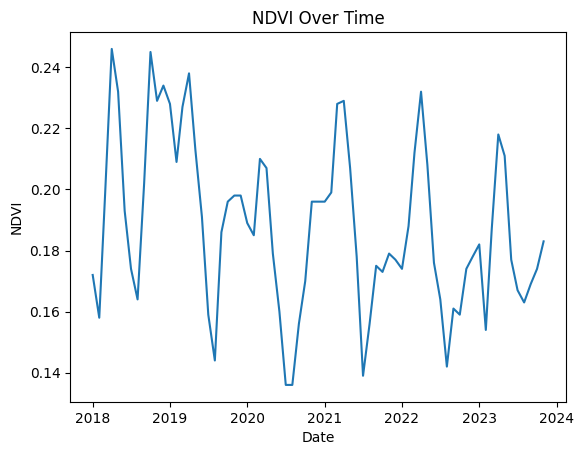

In [ ]:
plt.figure()
plt.plot(data['date'], data['NDVI'])
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Over Time')
plt.show()


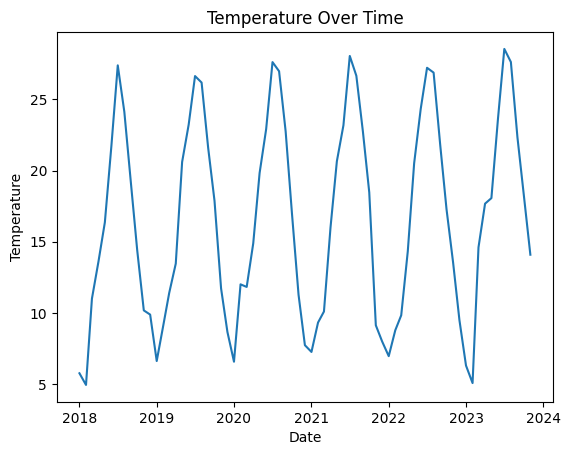

In [ ]:
plt.figure()
plt.plot(data['date'], data['temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.show()


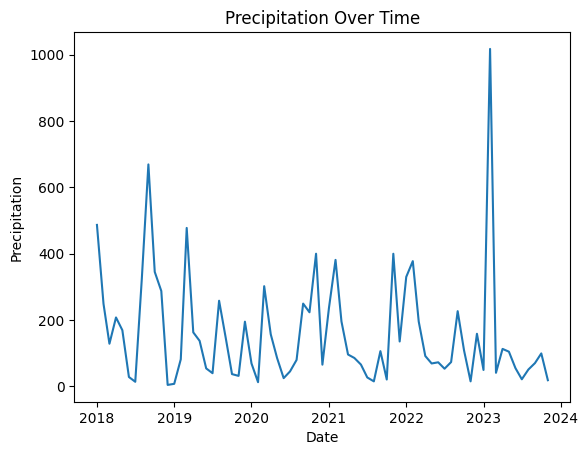

In [ ]:
plt.figure()
plt.plot(data['date'], data['precipitation'])
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Over Time')
plt.show()


**Correlation check:** Correlation matrix

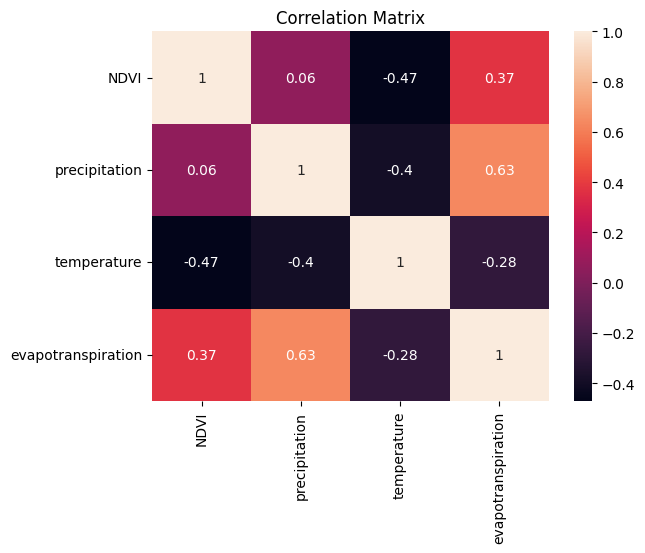

In [ ]:
plt.figure()
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
print(data.corr(numeric_only=True)['NDVI'])


NDVI                  1.000000
precipitation         0.060117
temperature          -0.471084
evapotranspiration    0.369685
Name: NDVI, dtype: float64


Interpretation:

* +0.45 → moderate positive relation

* -0.30 → moderate negative relation

* 0 → no relation

**Correlation:** NDVI vs Precipitation

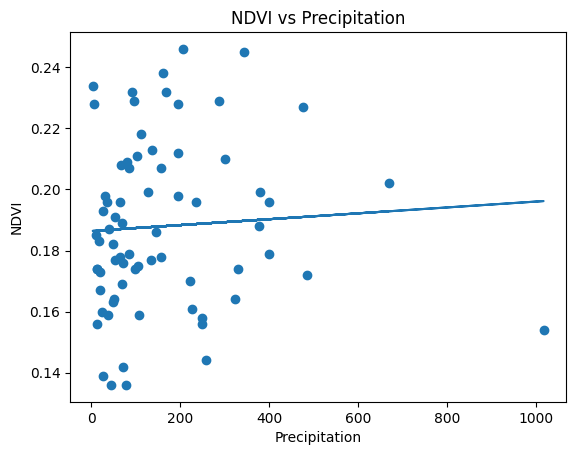

In [ ]:
x = data['precipitation']
y = data['NDVI']

plt.figure()
plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel('Precipitation')
plt.ylabel('NDVI')
plt.title('NDVI vs Precipitation')
plt.show()


**Precipitation → 0.06**

Almost zero correlation.
Meaning: monthly NDVI does not respond immediately to monthly rainfall.
This is very realistic in oasis systems (lag effect).

**Correlation:** NDVI vs Temperature

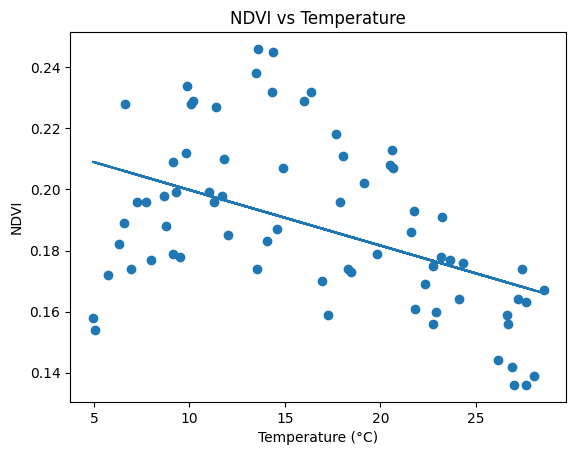

In [ ]:
x = data['temperature']
y = data['NDVI']

plt.figure()
plt.scatter(x, y)

# Fit linear regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel('Temperature (°C)')
plt.ylabel('NDVI')
plt.title('NDVI vs Temperature')
plt.show()


**Temperature → -0.47**

Moderate negative correlation.

Meaning: higher temperature → lower NDVI.

(heat stress).

**Correlation**: NDVI vs Evapotranspiration

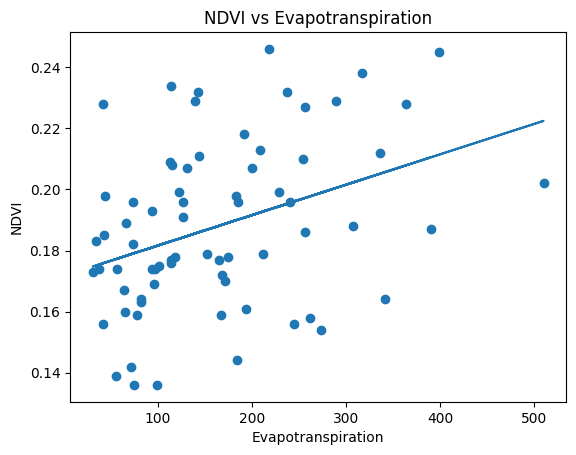

In [ ]:
x = data['evapotranspiration']
y = data['NDVI']

plt.figure()
plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel('Evapotranspiration')
plt.ylabel('NDVI')
plt.title('NDVI vs Evapotranspiration')
plt.show()



**Evapotranspiration → 0.37**

Moderate positive correlation.

Vegetation increases ET (transpiration).


# Water Balance

**Create Water Balance Variable**

In [ ]:
# Compute water balance (Water Deficit)
data['water_deficit'] = data['evapotranspiration'] - data['precipitation']
data.head()

,date,NDVI,precipitation,temperature,evapotranspiration,water_deficit
0,2018-01-01,0.172,486.522642,5.748585,167.672951,-318.849690
1,2018-02-01,0.158,248.339798,4.929190,261.339836,13.000038
2,2018-03-01,0.199,127.923360,10.997184,228.286915,100.363555
3,2018-04-01,0.246,207.253762,13.615463,217.767921,10.514159
4,2018-05-01,0.232,168.795162,16.356570,237.616098,68.820936


Interpretation:

* Positive → ET > P → water deficit

* Negative → P > ET → water surplus

**Plot Water Deficit Over Time**

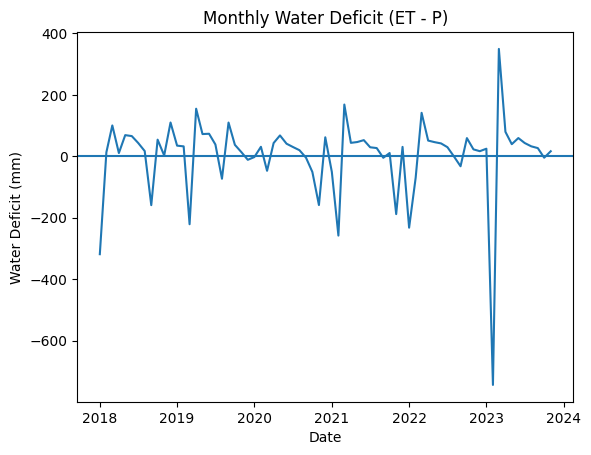

In [ ]:
plt.figure()
plt.plot(data['date'], data['water_deficit'])
plt.axhline(0)  # zero reference line
plt.xlabel('Date')
plt.ylabel('Water Deficit (mm)')
plt.title('Monthly Water Deficit (ET - P)')
plt.show()

Do deficit periods correspond to low NDVI?

**Correlation With NDVI**

In [ ]:
print(data[['NDVI', 'water_deficit']].corr())

                   NDVI  water_deficit
NDVI           1.000000       0.206365
water_deficit  0.206365       1.000000


NDVI vs Water Deficit =**+0.206**
* It is a weak positive correlation
* It is small
* It is not strong
* It is probably not statistically significant

It is **positive**, not negative.


# Lag effect test

Maybe NDVI responds to:

* Previous month precipitation

* Previous month water balance

Lag often improves relationship in vegetation studies.

In [ ]:
# Ensure date is datetime and sorted
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')

In [ ]:
# Create 1-month lag variables
data['precip_lag1'] = data['precipitation'].shift(1)
data['temp_lag1'] = data['temperature'].shift(1)
data['deficit_lag1'] = data['water_deficit'].shift(1)

The first row will become NaN because there is no previous month.

In [ ]:
# Drop rows with NaN (caused by lag)
lag_data = data.dropna()

**Check Correlations (Lagged)**

In [ ]:
print("Lagged Correlations with NDVI:\n")

print("NDVI vs Precip (lag 1):",
      lag_data['NDVI'].corr(lag_data['precip_lag1']))

print("NDVI vs Temperature (lag 1):",
      lag_data['NDVI'].corr(lag_data['temp_lag1']))

print("NDVI vs Water Deficit (lag 1):",
      lag_data['NDVI'].corr(lag_data['deficit_lag1']))

Lagged Correlations with NDVI:

NDVI vs Precip (lag 1): 0.34515227054071035
NDVI vs Temperature (lag 1): -0.5593521750357667
NDVI vs Water Deficit (lag 1): 0.008326983428570332
